More specifically we're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, age, sex, bmi, children, smoking_status and residential_region

To do, we'll leverage the pubically available Medical Cost dataset available from Kaggle and hosted on GitHub.



In [2]:
# importing libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


Publically available [Medical Cost dataset ]("https://www.kaggle.com/datasets/mirichoi0218/insurance"
) from Kaggle and
[hosted on github]("https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv")


In [4]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [6]:
# Check out the insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


.head() gives first 5 entries in the data

We're going to have to turn the non-numerical columns into numbers (because a neural network can't handle non-numerical inputs).

To do so, we'll use the get_dummies() method in pandas.

It converts categorical variables (like the sex, smoker and region columns) into numerical variables using one-hot encoding.

In [8]:
# turning all categories into numbers
insurance_one_code = pd.get_dummies(insurance)
insurance_one_code.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


Now we'll split data into features (X) and labels (y).



In [10]:
# creating X and y values
X = insurance_one_code.drop("charges", axis=1)
y = insurance_one_code["charges"]

In [13]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


And create training and test sets. We could do this manually, but to make it easier, we'll leverage the already available train_test_split function available from Scikit-Learn.

In [16]:
#importing Sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state = 42)


In [17]:
len(X_train), len(X_test)

(1070, 268)

Now we can build and fit a model (with 2 layers and 100 epochs ).



In [19]:
# set random seed
tf.random.set_seed(42)

# create the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

#fit the model
insurance_model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13345.8809 - mae: 13345.8809
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13339.2725 - mae: 13339.2725
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12938.0078 - mae: 12938.0078
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12211.1436 - mae: 12211.1436
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 12147.5459 - mae: 12147.5459
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 12062.2051 - mae: 12062.2051
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 11926.1689 - mae: 11926.1689
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 11697.8838 - mae: 11697.8838
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 11307.6113 - mae: 11307.6113
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 10727.64

In [ ]:
# Check the results of the insurance model
insurance_model.evaluate(X_test, y_test)

Our model didn't perform very well, let's try a bigger model.

We'll try 3 things:

* Increasing the number of layers (2 -> 3).
* Increasing the number of units in each layer (except for the output layer).
* Changing the optimizer (from SGD to Adam).
Everything else will stay the same.

In [24]:
# set random seed
tf.random.set_seed(42)

#create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1) # important that output layer has one unit
])

#compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # trying different optimizer (Adam)
                          metrics=["mae"])

#fit the model and save the history
history = insurance_model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)


In [25]:
# checking the results
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8627.7598 - mae: 8627.7598


[8627.759765625, 8627.759765625]

Let's check out the loss curves of our model, we should see a downward trend.



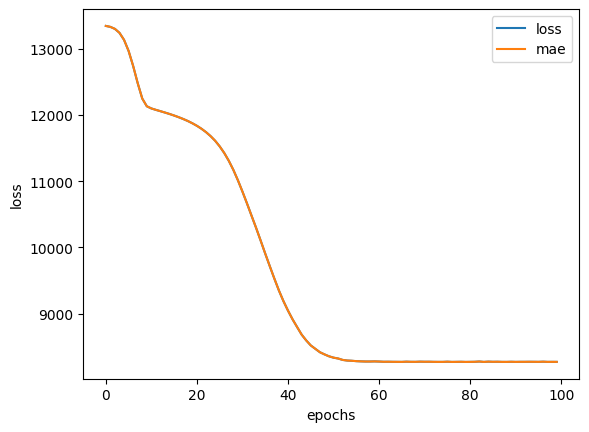

In [26]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [28]:
# Try training for a little longer (100 more epochs)
history_2 = insurance_model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [29]:
 #Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 4ms/step - loss: 8627.3350 - mae: 8627.3350


(8627.3349609375, 8627.3349609375)

We are getting same result ,
So training for more epochs didnt work

In [38]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 6ms/step - loss: 8627.5107 - mae: 8627.5107


[8627.5107421875, 8627.5107421875]

##Preprocessing data (normalization and standardization)

This practice is called normalization (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call standardization which converts all of your data to unit variance and 0 mean.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [41]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Now, just as before, we need to transform the non-numerical columns into numbers and this time we'll also be normalizing the numerical columns with different ranges (to make sure they're all between 0 and 1).

To do this, we're going to use a few classes from Scikit-Learn:

* make_column_transformer - build a multi-step data preprocessing function for the folllowing transformations:
* MinMaxScaler - make sure all numerical columns are normalized (between 0 and 1).
* OneHotEncoder - one hot encode the non-numerical columns.

In [42]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [45]:
# Non-normalized and non-one-hot encoded data example
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [46]:
# Normalized and one-hot encoded example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [47]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [48]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)

Let's evaluate the model on normalized test set.



In [49]:
# Evaulate 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3169.9128 - mae: 3169.9128


## comparing results


In [54]:
model_results = [["model_2", insurance_model_2_mae],
                 ["model_3", insurance_model_3_mae]]


In [57]:
all_results = pd.DataFrame(model_results, columns=["model", "mae"])
all_results

,model,mae
0,model_2,8627.334961
1,model_3,3169.912842


model_3 performed significantally great
thats the power of normallisation